# some Examples with `ipywidgets`

## small Example

In [1]:
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# apply widget as a wrapper to a fuction
@widgets.interact(x=(0,15))
def f(x=5):
    print(x,': ', [x**2 for x in np.arange(x+1)])

interactive(children=(IntSlider(value=5, description='x', max=15), Output()), _dom_classes=('widget-interact',…

## Parabola

see: [ipywidgets @ read the docs - examples >> interact()](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)

### function for plotting the diagram

let's define a fuction for plotting a parabola and tangent
- aproach
  1. just start usual matplotlib plt definition
  2. indent that block
  3. before 1st line: make a ```def fuction(parameters):``` line 
  4. add a return; the ```return(plt.show()```

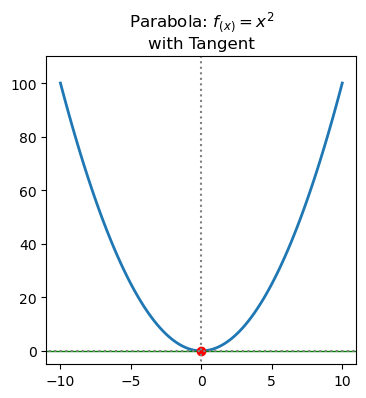

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from matplotlib.lines import Line2D

import numpy as np

##########################
# some helper functions 
# used at main figure plot
##########################
def gen_parabel_data(xmin:int, xmax:int, num_of_points:int) -> (np.ndarray, np.ndarray):
    x_arr = np.linspace(xmin, xmax, num=num_of_points, endpoint=True )
    y_arr = x_arr ** 2
    return(x_arr, y_arr)

def set_axis_xy_limits(ax:plt.axis, x_arr:np.ndarray, y_arr:np.ndarray) -> plt.axis:
    ax.set_xlim( (np.min(x_arr) * 1.1, np.max(x_arr) * 1.1) )
    ax.set_ylim( (-5, np.max(y_arr) * 1.1) )
    return(ax)

def calc_and_add_tangente(ax:plt.axis, x_coord_of_point:float, slope_factor:float) -> plt.axis:
    radius = 100
    pt_x = x_coord_of_point
    m = slope_factor   # for parabel: y'=2x or in general: y=mx+b; here: m=2x
    w_rad = np.arctan(m)  # aus f'=2x oder y_tangente=m*x+b => m=2x; m ist die Steigung
    tang_x_arr = np.sort([pt_x + radius * np.cos(w_rad), 
                          pt_x - radius * np.cos(w_rad) ])
    #              
    tang_y_arr = [2*pt_x * x -1*(pt_x ** 2)   for x in tang_x_arr]
    tang = Line2D(tang_x_arr,
                  tang_y_arr,
                  c='green',
                  lw=1)
    ax.add_artist(tang)
    return(ax)

def add_cross_lines(ax: plt.axis, x_coord_of_point:float) -> plt.axis:
    pt_x = x_coord_of_point
    ax.vlines(pt_x, 
              ymin=-10, 
              ymax=200, 
              color='gray', 
              linestyles='dotted')
    ax.hlines(pt_x ** 2, 
              xmin=-20, 
              xmax=20, 
              color='gray', 
              linestyles='dotted')
    return(ax)

##########################
# the main figure plot
##########################
def show_diagram(pt_x=0):
    # the figure, axes 
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)
    
    # the parabel
    x_arr, y_arr = gen_parabel_data(-10, 10, 100)
    
    # diagram's limits to show
    ax = set_axis_xy_limits(ax, x_arr, y_arr)

    # plot the parabel
    ax.plot(x_arr, y_arr, lw=2)

    # calc the tangente, and
    # add as a Line2D to diagram             
    ax = calc_and_add_tangente(ax, pt_x, 2*pt_x)
    
    # plot the red point
    ax.plot(pt_x, pt_x ** 2, c='r', marker='o')
    
    # give cross lines through point
    ax = add_cross_lines(ax, pt_x)
    
    # set title of diagram
    ax.set_title( 'Parabola: $f_{(x)} = ' + ' x^{2}$\nwith Tangent')  
    
    # show the diagram
    return(fig.show())

show_diagram(0)

### Interaction by widget `FloatSilder`

by `FloatSlider` you can mnipulate the tangent running around the parabola

In [3]:
###################################
# apply the interger-slider widget
###################################
# simpler 
#   use widget.interact(<function_name>, <variable> = (min, max))
# e.g.:
#   widget.interact(show_diagram, pt_x=(-10, 10))
# but, here you have full control :-)
widgets.interact(show_diagram,
                 pt_x=widgets.FloatSlider(min=-10, 
                                        max=10, 
                                        step=0.25, 
                                        value=0,
                                        description='$Pt_{x}$',
                                        continuous_update=True));

interactive(children=(FloatSlider(value=0.0, description='$Pt_{x}$', max=10.0, min=-10.0, step=0.25), Output()…

### Interaction by widget `Play`

by `Play` you start the tangent automatically running around the parabola

In [4]:
widgets.interact(show_diagram, pt_x=widgets.Play(value=-10,
                                                 min=-10,
                                                 max=10,
                                                 step=1,        # step minimum == 1 (int only)
                                                 interval=250,  # time betwenn steps in millisec
                                                 description="Press play",
                                                 disabled=False # to enable the widget
                                                ));

interactive(children=(Play(value=-10, description='Press play', interval=250, max=10, min=-10), Output()), _do…

## Interact with both widgets `Play` and `FloatSlider`: `jslink`ed

by jslinked widget you can choose
  1. to play the sequence, or
  2. stop it any time and manipulate by mouse

In [5]:
import ipywidgets as widgets
from IPython.display import display

play = widgets.Play(value=-10,
                 min=-10,
                 max=10,
                 step=1,         # step minimum == 1 (integers only)
                 interval=250,   # time between steps in millisec
                 description="Press play",
                 disabled=False) # to enable the widget

fslider = widgets.FloatSlider(min=-10, 
                              max=10, 
                              step=0.25, 
                              value=0,
                              description='$Pt_{x}$',
                              continuous_update=True)

widgets.jslink((play, 'value'), (fslider, 'value')) # the jslink
ui = widgets.HBox([play, fslider]) # to display them apart horizontally

def f(play, fslider):
    # as widgets are jslinl_ed we only need one of them
    show_diagram(play)

out = widgets.interactive_output(f, {'play': play, 'fslider': fslider})

display(ui, out) # the output

Output()